In [2]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN


In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
k=2
e=3
m=2

Original image


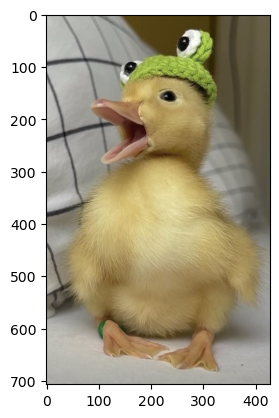

Image with 2 colours


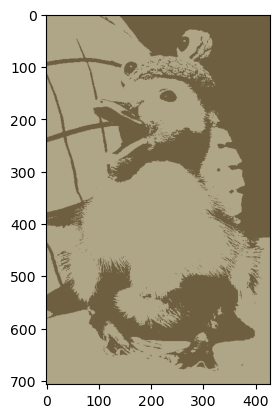

Image with 2 colours in B&W


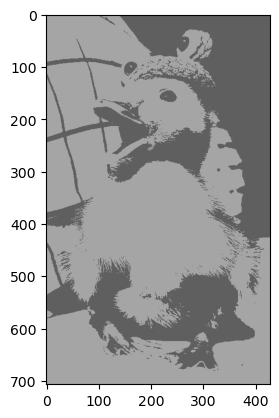

In [9]:
img1=image.imread("duck.jpg")
plt.imshow(img1)
print("Original image")
plt.show()

(h,w,c)=img1.shape
img1_2d=img1.reshape(h*w,c)
kmean=KMeans(n_clusters=k)
kmean.fit(img1_2d)
predict=kmean.fit_predict(img1_2d)
centers=kmean.cluster_centers_
img_pred=np.reshape(centers.round(0).astype('int')[predict],(h,w,c))
plt.imshow(img_pred) 
print(f"Image with {k} colours")
plt.show()

centers=rgb2gray(centers)
img_pred_g=np.reshape(centers.round(0).astype('int')[predict],(h,w))
plt.imshow(img_pred_g, cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
print(f"Image with {k} colours in B&W")
plt.show()

# clust=[]
# dbclust = DBSCAN(eps=1, min_samples=200,n_jobs=-1).fit(img1_2d)
# predict_db=dbclust.labels_
# for i in np.unique(dbclust.labels_):
#     clust.append([img1_2d[predict_db==i][:,0].mean(),
#               img1_2d[predict_db==i][:,1].mean(),
#               img1_2d[predict_db==i][:,2].mean()])


# img_pred_db=np.reshape(np.array(clust).round(0).astype('int')[predict_db],(h,w,c))
# plt.imshow(img_pred_db) 
# print(f"Image with {np.unique(dbclust.labels_).max()+2} colours")
# plt.show()


Image with 2 colours


c:\Users\owahl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\owahl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


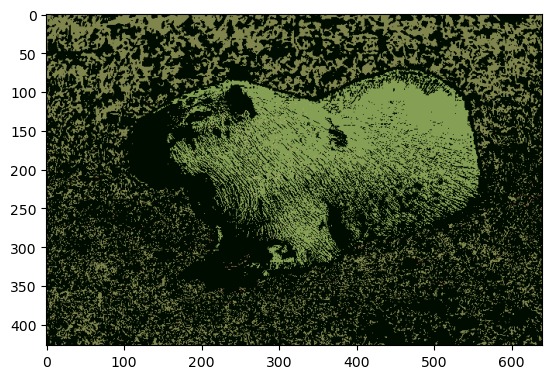

In [ ]:

dbclust = DBSCAN(eps=5, min_samples=400).fit(img1_2d)
predict_db=dbclust.labels_
clust=[]
for i in np.unique(dbclust.labels_):
    clust.append([img1_2d[predict_db==i][:,0].mean(),
              img1_2d[predict_db==i][:,1].mean(),
              img1_2d[predict_db==i][:,2].mean()])

img_pred_db=np.reshape(np.array(clust).round(0).astype('int')[predict_db],(h,w,c))
plt.imshow(img_pred_db) 
print(f"Image with {k} colours")
plt.show()
